<a href="https://colab.research.google.com/github/andrewRowlinson/data-science/blob/master/football/offset_lines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mplsoccer

     |████████████████████████████████| 57 kB 651 kB/s 
  Created wheel for mplsoccer: filename=mplsoccer-1.0.5-py3-none-any.whl size=62946 sha256=7e4b4802d8cd9c342dfdc3a35e02e072e4e139ba4e8c17d84e8ef15e3b4896b0
  Stored in directory: /root/.cache/pip/wheels/35/71/46/5f3df8e696517b395ed75971c4d09f5854310efc09d364a9ca
Successfully built mplsoccer


In [2]:
import matplotlib.pyplot as plt
import numpy as np

from mplsoccer import Pitch

In [3]:
def shift_lines(xstart, ystart, xend, yend, shift=3):
    # gradient of the lines
    xdiff = xend - xstart
    ydiff = yend - ystart
    m = np.divide(ydiff, xdiff, where=xdiff!=0)

    # center of the lines
    cx = (xstart + xend) / 2
    cy = (ystart + yend) / 2

    # gradient and intercept of the perpendicular line
    m_p = np.divide(-1, m, where=m!=0)
    c_p = cy - (m_p * cx)

    # formula from https://math.stackexchange.com/questions/175896/
    # finding-a-point-along-a-line-a-certain-distance-away-from-another-point
    # but simplified for the intercept
    # here we find the shifted midpoint
    d = np.sqrt(np.square(cx) + np.square(cy - c_p))
    cx1 = cx - (shift * cx) / d
    cy1 = m_p * cx1 + c_p
    cx2 = cx + (shift * cx) / d
    cy2 = m_p * cx2 + c_p

    # override the results in the case x = constant or y = constant
    cx1 = np.where(xstart == xend, cx - shift, np.where(ystart == yend, cx, cx1))
    cx2 = np.where(xstart == xend, cx + shift, np.where(ystart == yend, cx, cx2))
    cy1 = np.where(xstart == xend, cy, np.where(ystart == yend, cy - shift, cy1))
    cy2 = np.where(xstart == xend, cy, np.where(ystart == yend, cy + shift, cy2))

    # get upper line
    xstart1 = cx1 - xdiff / 2
    ystart1 = cy1 - ydiff / 2
    xend1   = cx1 + xdiff / 2
    yend1   = cy1 + ydiff / 2

    # get lower line
    xstart2 = cx2 - xdiff / 2
    ystart2 = cy2 - ydiff / 2
    xend2   = cx2 + xdiff / 2
    yend2   = cy2 + ydiff / 2
    
    return xstart1, ystart1, xend1, yend1, xstart2, ystart2, xend2, yend2

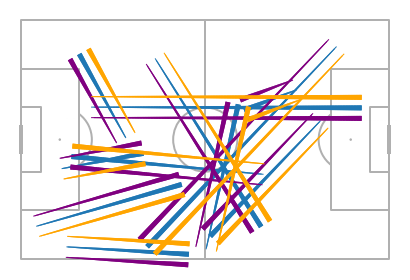

In [6]:
pitch = Pitch(pitch_type='custom', pitch_length=105, pitch_width=68)

# generate 3 random lines
xstart, xend = np.random.uniform(0, 105, size=(2, 11))
ystart, yend = np.random.uniform(0, 68, size=(2, 11))

xstart1, ystart1, xend1, yend1, xstart2, ystart2, xend2, yend2 = shift_lines(xstart, ystart, xend, yend, shift=3)

fig, ax = pitch.draw()
pitch.lines(xstart, ystart, xend, yend, comet=True, ax=ax)
pitch.lines(xstart1, ystart1, xend1, yend1,
            comet=True, ax=ax, color='purple')
pitch.lines(xstart2, ystart2, xend2, yend2,
            comet=True, ax=ax, color='orange')